# Task 2.2.1

* Loading data and Shuffling it 

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures as PF
import matplotlib.pyplot as plt

with open('data/train.pkl', 'rb') as f:
    load_data = pickle.load(f)

with open('data/test.pkl', 'rb') as f:
    load_data2 = pickle.load(f)

np.random.shuffle(load_data)


* Separating the x values of data and y values of data in two different lists and then converting them to numpy arrays so that they can be used further 
* Test data and train data are being evaluated separately

In [2]:

arr = np.array(np.split(load_data, 16))

area_val = []
cost_val = []

area_val= arr[:, :, 0]
cost_val = arr[:, :, 1]

area_val = np.array(area_val)
cost_val = np.array(cost_val)

testArea = []
testCost = []

testArea = load_data2[:, 0]
testCost = load_data2[:, 1]
testArea = np.array(testArea)
testCost = np.array(testCost)


# Task 2.2.2


* We are converting the data in x coordinates to 2 dimensional as the LinearRegression().fit() function expects so.
* We are plotting the different models

In [4]:
trainingDataX, trainingDataY, predicted_values, testingDataX, testingDataY = [], [], [], [], []



for i in range(0, 16):
    trainingDataX.append([[x] for x in area_val[i]])
#    trainingDataY.append(cost_val[i])


trainingDataY = cost_val[:]

testingDataX = [[x] for x in testArea]
testingDataY = testCost


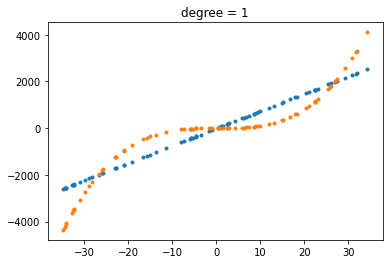

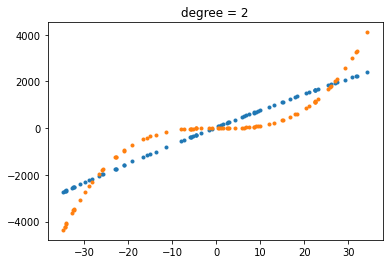

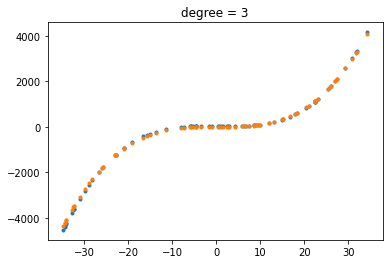

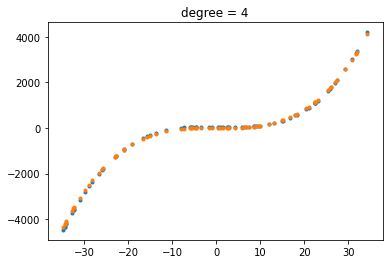

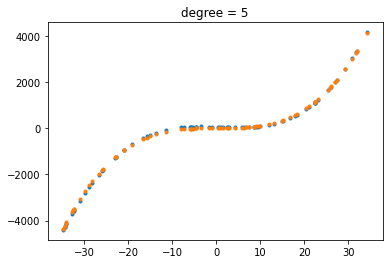

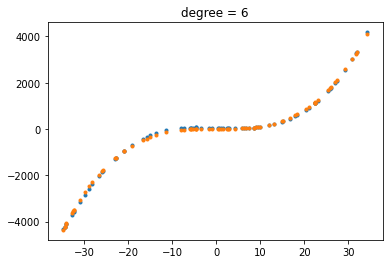

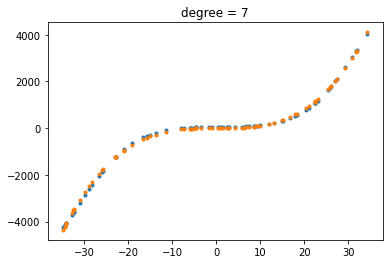

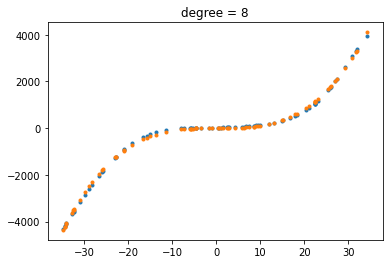

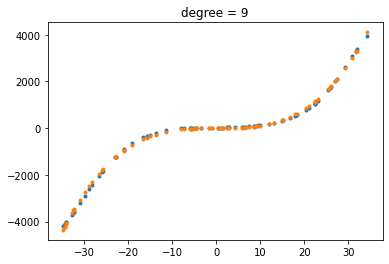

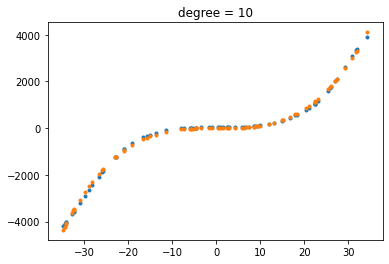

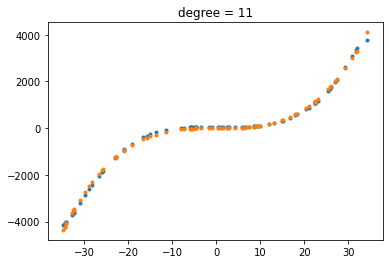

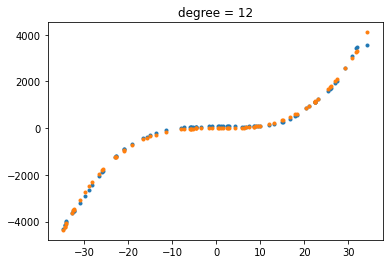

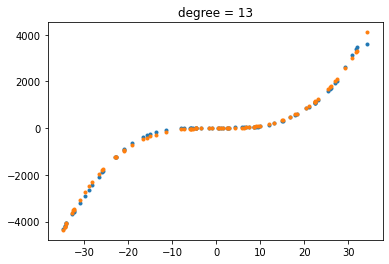

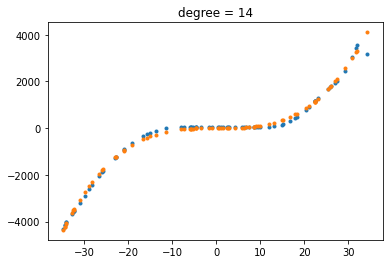

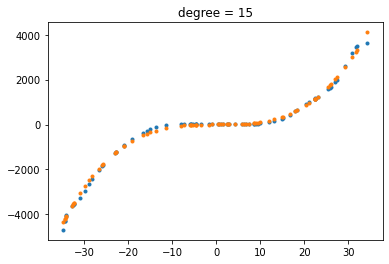

In [13]:
# classifier = [LR()]*16
# for i in range(0, 16):
#     classifier[i].fit(trainingDataX[i], trainingDataY[i])
#     predicted_values.append(classifier[i].predict(testingDataX))

# predicted_values = np.array(predicted_values)

# meanOutput = np.mean(predicted_values, axis=0)

predictedValues = []
meanOutputs = []

for degreeVal in range(1, 16):
    classifier = [LR()]*16
    trans = [PF(degree=degreeVal)]*16
    yValues = []
    for i in range(0, 16):
        classifier[i].fit(trans[i].fit_transform(trainingDataX[i]), trainingDataY[i])
        yValues.append(classifier[i].predict(trans[i].transform(testingDataX)))
    predictedValues.append(yValues)
    meanOutputs.append(np.mean(yValues, axis=0))
    plt.title('degree = ' + str(degreeVal))
    plt.plot(testingDataX, meanOutputs[degreeVal-1], '.')
    plt.plot(testingDataX, testingDataY, '.')
    plt.show()

predictedValues = np.array(predictedValues)
meanOutputs = np.array(meanOutputs)

In [6]:
def calc_bias(y, y_hat):
    return np.mean((np.array(y - y_hat))**2)


def calc_variance(y, y_hat):
    variance_array = []
    for i in range(0, 16):
        temp_array = []
        for j in range(0, 80):
            temp_array.append((y[i][j] - y_hat[j])**2)
        variance_array.append(np.mean(np.array(temp_array)))
    return variance_array

In [7]:
bias_square = []
variance = []
for degreeVal in range(0, 15):
    biasSquare = calc_bias(testingDataY, meanOutputs[degreeVal])
    varianceArray = calc_variance(predictedValues[degreeVal], meanOutputs[degreeVal])
    bias_square.append(biasSquare)
    variance.append(np.mean(varianceArray))

bias_square = np.array(bias_square)
variance = np.array(variance)


In [14]:

data = pd.DataFrame(np.array([np.sqrt(bias_square), variance]).T)
data.index = range(1, 16)
data.columns = ['bias', 'variance']
data.round(3)

,bias,variance
1,701.259,30320.031
2,684.383,43753.256
3,61.066,45295.100
4,54.198,69923.929
5,50.878,87589.258
6,48.715,107203.961
7,60.698,112011.695
8,59.842,116632.449
9,69.462,164423.239
10,72.456,215566.240


# Task 3

In [9]:
def calc_mse():
    mse = []
    for degreeVal in range(1, 16):
        mse.append(np.mean((testingDataY - predictedValues[degreeVal-1])**2))
    return mse

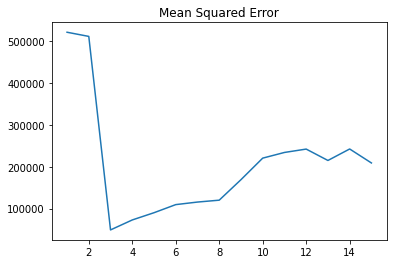

In [15]:
mse = calc_mse()
mse = np.array(mse)
plt.title('Mean Squared Error')
plt.plot(range(1, 16), mse)
plt.show()


In [16]:
irred_error = mse - bias_square - variance

data = pd.DataFrame(irred_error)
data.index = range(1, 16)
data.columns = ['Irreducible error']
data

,Irreducible error
1,8.003553e-11
2,1.455192e-11
3,1.455192e-11
4,0.000000e+00
5,-1.455192e-11
6,-1.455192e-11
7,0.000000e+00
8,-2.910383e-11
9,0.000000e+00
10,0.000000e+00


# Task 4

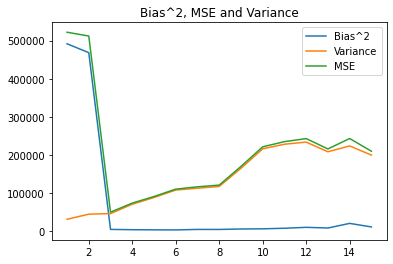

In [12]:

plt.title('Bias^2, MSE and Variance')
plt.plot(range(1, 16), bias_square,label='Bias^2')
plt.plot(range(1, 16), variance ,label='Variance')
plt.plot(range(1, 16), mse, label='MSE')
plt.legend()
plt.show()
